# Lattice Reductions through SageMath

### by Devanshi Jain

Due to recent developments in the field of quantum computers, cryptologists are actively looking to build quantum-resistant cryptographic algorithms. Using those machines, many of today’s most prevalent cryptosystems can be cracked by  Shor's Algorithm which uses quantum computation to equate the prime number phases expressed as sine waves to factor large integers, effectively solving the discrete logarithm problem that many current cryptographic algorithms are focused on.

Predominantly, state-of-the-art public key algorithms are based on three types of problems:
- the discrete algorithm problem, 
- the entire factoring problem, and 
- the new pre-eminent elliptical curve discrete algorithm problem.
These three groups are predicted to be broken by Shor‘s quantum PC approximation. This is undoubtedly concerning, considering that these equations are prevalently used to ensure the protected sharing of confidential information across the Internet, the development of digital signatures and the securing of other links over unsafe networks.

The quest for a classic, non-quantum cryptography algorithm that will operate in current real-time infrastructures is an increasingly growing field of study. These quantum robust algorithms are called Post-Quantum Cryptography (PQC) algorithms and are assumed to remain stable after the availability of functional large-scale quantum computing machines.

Every modern cryptography must be combined with existing protocols, such as transport layer security. The latest cryptosystem has to weigh:
- The size of the encryption keys and the signature.
- Time taken to encrypt and decrypt at either end of a contact line, or to sign messages and validate signature.
• For each proposed alternative, the amount of traffic sent over the wire needed to complete encryption or decryption or to transmit a signature.

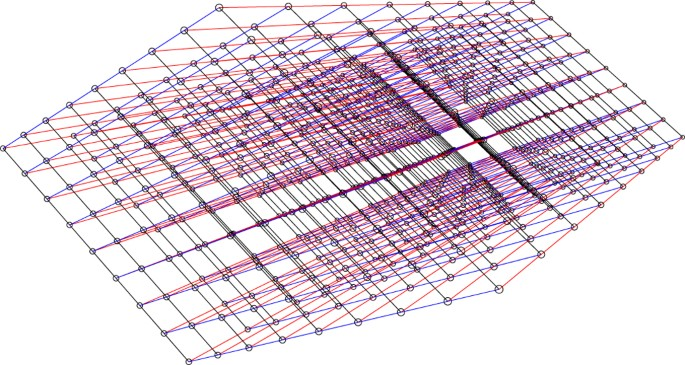

Most cryptographic structures can be categorized into these families: 
- Lattice-Based Cryptography,
- Multivariate Cryptography Protocols,
- Hash-Based Signature Algorithms
- Code-Based Cryptography

There have been several transitions to new cryptographic standards. From 2010 until 2015, from two-key to three-key triple DES encryption and transitions for RSA Key Transport using RSA-1024 to RSA-2048 took from 2010 to 2013. We expect a similar timeframe for quantum-resistant standards to be released. 

In [7]:
M = matrix([[1,2],[3,4]]); M

[1 2]
[3 4]

In [8]:
M * vector([1,1])

(3, 7)

We can compute the LLL and BKZ reduced forms of matrix, as follows:

In [9]:
M.LLL()

[1 0]
[0 2]

In [10]:
M.BKZ()

[1 0]
[0 2]

In [14]:
N = matrix([[2,0,0,2],[ -2, 1/2, 0, -2],[ -2, -1/2, 1, -1],[ 2, 1, -1, 1],[0,0, 0, -1]]); N

[   2    0    0    2]
[  -2  1/2    0   -2]
[  -2 -1/2    1   -1]
[   2    1   -1    1]
[   0    0    0   -1]

In [40]:
N.LLL()

[  0   0   0   0]
[  0 1/2   0   0]
[  0   0   0  -1]
[  0   0   1   0]
[  2   0   0   0]

#### The Knapsack Problem 

It is a problem in combinatorial optimization. Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively.

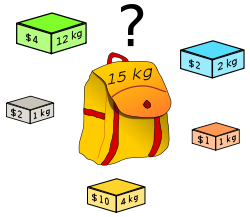

In [52]:
sage: C = 3659
sage: L = ["gauss", "euler", "ramanujan", "riemann", "descartes"]
sage: L.extend(["random_stuff_" + str(i) for i in range(10)])
sage: set_random_seed(685474)
sage: weights = [randint(100,1000) for o in L]

In [53]:
sage: p = MixedIntegerLinearProgram(maximization=True)
sage: taken = p.new_variable(binary=True)
sage: p.add_constraint(p.sum(w * taken[o] for o,w in zip(L, weights)), max=C)
sage: p.set_objective(p.sum(w * taken[o] for o,w in zip(L, weights)))
sage: p.solve()

3659.0

In [54]:
sage: taken = p.get_values(taken)

In [55]:
sage: sum(w * taken[o] for o,w in zip(L, weights))

3659.0

Is 'riemann' is the collection?

In [56]:
sage: taken["riemann"]

0.0

Is 'ramanujan' is the collection?

In [57]:
sage: taken["ramanujan"]

1.0

In [50]:
from sage.numerical.knapsack import knapsack
knapsack

<function knapsack at 0x7fa1fac90160>

Knapsack problems can be restated in terms of finding short vectors in a lattice. Suppose we know there is a solution to the problem that reaches the objective cost C (for example, in the cryptanalysis of the Merkle-Hellman system). Given items with weights w0,…,wn, we want to find binary variables v0,…,vn such that
$\sum_{i} v_iw_i = C $

This can be restated as a lattice problem: consider the lattice,
$\\Λ = 
\begin{bmatrix}
1 & 0 & \dots & 0 & w_0\\
0 & 1 & \dots & 0 & w_0\\
. &  & & & .\\
. &  & & & .\\
. &  & & & .\\
0 & 0 & \dots & 1 & w_n\\
0 & 0 & \dots & 0 & -C\\
\end{bmatrix}$
Where, $a=(v_0,\dots,v_n,0)$ is a short vector in Λ. We can find the shortest vector, $a$, using a lattice reduction algorithm, such as LLL.

In [48]:
M = sage.crypto.gen_lattice(m=10, seed=42, type="modular")
M.LLL(delta=0.99, eta=0.51) # calls fplll

[ 0  0  1  1  0 -1 -1 -1  1  0]
[-1  1  0  1  0  1  1  0  1  1]
[-1  0  0  0 -1  1  1 -2  0  0]
[-1 -1  0  1  1  0  0  1  1 -1]
[ 1  0 -1  0  0  0 -2 -2  0  0]
[ 2 -1  0  0  1  0  1  0  0 -1]
[-1  1 -1  0  1 -1  1  0 -1 -2]
[ 0  0 -1  3  0  0  0 -1 -1 -1]
[ 0 -1  0 -1  2  0 -1  0  0  2]
[ 0  1  1  0  1  1 -2  1 -1 -2]

In [49]:
A = sage.crypto.gen_lattice(m=100, seed=42, q=next_prime(2^20))
B = A.BKZ(block_size=60, proof=False) # calls fplll's BKZ 2.0
B[0].norm().log(2).n()

2.26178097802851

In [7]:
from sage.modules.free_module_integer import IntegerLattice
A = random_matrix(ZZ, 80, 80, x=-2000, y=2000)
L = IntegerLattice(A); L

Free module of degree 80 and rank 80 over Integer Ring
User basis matrix:
80 x 80 dense matrix over Integer Ring

In [9]:
L.shortest_vector().norm().log(2).n()

13.1664085843940

Lattice-Based public-key cryptography

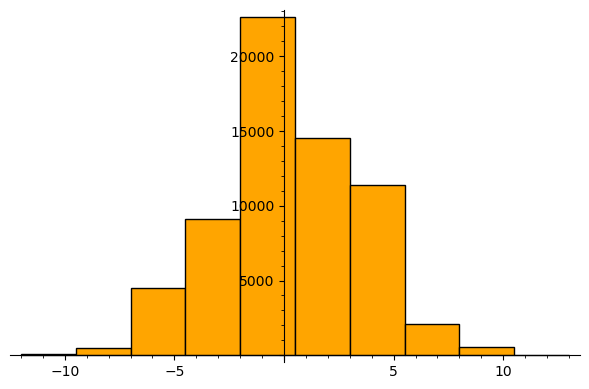

In [10]:
sage: from sage.stats.distributions.discrete_gaussian_integer import \
DiscreteGaussianDistributionIntegerSampler
sage: D = DiscreteGaussianDistributionIntegerSampler(3.2)
sage: histogram([D() for _ in range(2^16)], color="orange")

In [11]:
sage: from sage.stats.distributions.discrete_gaussian_lattice import \
DiscreteGaussianDistributionLatticeSampler
sage: A = random_matrix(ZZ, 2, 2)
sage: D = DiscreteGaussianDistributionLatticeSampler(A, 20.0)
sage: S = [D() for _ in range(2^12)]
sage: l = [vector(v.list() + [S.count(v)]) for v in set(S)]
sage: list_plot3d(l, point_list=True, interpolation='nn')

Graphics3d Object

In [32]:
sage: M = GSO.Mat(A)
sage: _ = M.update_gso()
sage: M.get_mu(1,0)

0.6535439289239882

In [34]:
sage: A[0].norm()

5.0

In [59]:
class BKZReduction:
    def __init__(self, A):
        self.A = A
        self.m = GSO.Mat(A, flags=GSO.ROW_EXPO)
        self.lll_obj = LLL.Reduction(self.m)

In [62]:
sage: from sage.modules.free_module_integer import IntegerLattice
sage: f
sage: IntegerLattice(f).basis_matrix()

64 x 64 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [63]:
sage: K = CyclotomicField(128)
sage: OK = K.ring_of_integers()
sage: f = OK.random_element(x=-128, y=128)
sage: L = IntegerLattice(f)
sage: _ = L.BKZ(block_size=50, proof=False)
sage: L.shortest_vector().norm().log(2).n()

9.16614723709846

### NTRU

NTRU is an open source public-key cryptosystem that uses lattice-based cryptography to encrypt and decrypt data. It consists of two algorithms: NTRUEncrypt, which is used for encryption, and NTRUSign, which is used for digital signatures. Unlike other popular public-key cryptosystems, it is resistant to attacks using Shor's algorithm.

NTRU was created in 1996 by Jeffrey Hoffstein, Jill Pipher and Joseph H. Silverman and patented one year later by NTRU Cryptosystems Inc, a company the three inventors established with Daniel Lieman. The name they gave the new system stands for “N-th degree Truncated polynomial Ring Units” (NTRU).

In [150]:
Zx.<x> = ZZ[]

This polynomial f is a sum of three terms: 4\*x^2, x, and 3. Each term is an integer coefficient (4, 1, and 3 respectively) times a power of x (x^2, x, and 1 respectively).

In [151]:
f = Zx([3,1,4]); f

4*x^2 + x + 3

In [152]:
#Polynomial Multiplication
f*x

4*x^3 + x^2 + 3*x

In [153]:
g = Zx([2,7,1]); g

x^2 + 7*x + 2

In [154]:
f*g

4*x^4 + 29*x^3 + 18*x^2 + 23*x + 6

Cyclic convolution: This is the multiplication operation used in NTRU. It is the same as polynomial multiplication but reduces the output "modulo x^n-1": this means replacing x^n with 1, replacing x^(n+1) with x, replacing x^(n+2) with x^2, etc.

In [159]:
def convolution(f,g):
      return (f * g) % (x^n-1)

In [160]:
n = 3
f*g

4*x^4 + 29*x^3 + 18*x^2 + 23*x + 6

In [161]:
convolution(f,x)

x^2 + 3*x + 4

In [162]:
convolution(f,x^2)

3*x^2 + 4*x + 1

Modular reduction: There are two inputs to balancedmod: an n-coefficient integer polynomial f; and a positive integer q. The output is the same polynomial except that each coefficient is reduced modulo q. Mathematicians normally define reduction to produce outputs between 0 and q-1, but balancedmod instead produces outputs between -q/2 and q/2: more precisely, between -q/2 and q/2-1 if q is even, or between -(q-1)/2 and (q-1)/2 if q is odd.

In [163]:
def balancedmod(f,q):
    g = list(((f[i] + q//2) % q) - q//2 for i in range(n))
    return Zx(g)

In [164]:
u = Zx([3,1,4,1,5,9]); u

9*x^5 + 5*x^4 + x^3 + 4*x^2 + x + 3

In [165]:
n = 7
balancedmod(u,10)

-x^5 - 5*x^4 + x^3 + 4*x^2 + x + 3

In [166]:
balancedmod(u,3)

-x^4 + x^3 + x^2 + x

Random polynomials with d nonzero coefficients: randomdpoly returns an n-coefficient polynomial where exactly d coefficients are nonzero (d are nonzero, the other n-d are all zero). Each nonzero coefficient is either 1 or -1. Beware that d and n are both global variables.

In [167]:
def randomdpoly():
      assert d <= n
      result = n*[0]
      for j in range(d):
        while True:
          r = randrange(n)
          if not result[r]: break
        result[r] = 1-2*randrange(2)
      return Zx(result)

In [168]:
n = 7
d = 5
f = randomdpoly()
f

x^6 + x^5 + x^3 + x^2 - x

In [169]:
f = randomdpoly()
f

-x^6 + x^5 + x^3 + x^2 + 1

Division modulo primes: invertmodprime computes a reciprocal of a polynomial modulo x^n-1 modulo p. There are two inputs: an n-coefficient polynomial f; and a prime number p (for example, 3). The output is an n-coefficient polynomial g so that convolution(f,g) is 1+p*u for some polynomial u. invertmodprime raises an exception if no such g exists.

In [170]:
def invertmodprime(f,p):
    T = Zx.change_ring(Integers(p)).quotient(x^n-1)
    return Zx(lift(1 / T(f)))

In [171]:
n = 7
f

-x^6 + x^5 + x^3 + x^2 + 1

In [204]:
f3 = invertmodprime(f,3)
f3

2*x^6 + x^5 + x^2

In [0]:
convolution(f,f3)

Division modulo powers of 2

In [0]:
def invertmodpowerof2(f,q):
      assert q.is_power_of(2)
      g = invertmodprime(f,2)
      while True:
        r = balancedmod(convolution(g,f),q)
        if r == 1: return g
        g = balancedmod(convolution(g,2 - r),q)

In [0]:
n = 7
q = 256
f

In [0]:
fq = invertmodpowerof2(f,q)
convolution(f,fq)

NTRU key generation: This returns an NTRU public key h and a corresponding secret key f,f3. The public key looks like a random n-coefficient polynomial modulo q. For example, if n = 7 (much too small for security!) and q = 256, then the public key looks like 7 random bytes:

In [173]:
def keypair():
      while True:
        try:
          f = randomdpoly()
          f3 = invertmodprime(f,3)
          fq = invertmodpowerof2(f,q)
          break
        except:
          pass
      g = randomdpoly()
      publickey = balancedmod(3 * convolution(fq,g),q)
      secretkey = f,f3
      return publickey,secretkey

In [174]:
n = 7
d = 5
q = 256
publickey,secretkey = keypair()
publickey

58*x^6 - 59*x^5 - 38*x^4 - 87*x^3 - 54*x^2 + 124*x + 47

The f part of the secret key is a polynomial with small coefficients. Convolution of f with the public key modulo q produces another polynomial with small coefficients, namely 3 times the g that appeared in key generation:

In [175]:
f,f3 = secretkey
f

-x^6 - x^5 + x^3 + x + 1

In [176]:
convolution(f,publickey)

-259*x^6 - 256*x^5 + 3*x^3 + 253*x^2 + 253*x - 3

Messages for encryption:randommessage returns an n-coefficient polynomial where each coefficient is either 1 or 0 or -1. 

In [177]:
def randommessage():
    result = list(randrange(3) - 1 for j in range(n))
    return Zx(result)

In [178]:
n = 7
randommessage()

-x^6 - x^3 + x^2 + 1

In [179]:
randommessage()

x^6 - x^5 + x^4 - x^3 - x

In [180]:
randommessage()

x^3 - x^2 + x - 1

#### Encryption

In [181]:
def encrypt(message,publickey):
    r = randomdpoly()
    return balancedmod(convolution(publickey,r) + message,q)

encrypt returns an NTRU ciphertext given a message and a public key h. The ciphertext is h*r+m modulo x^n-1 modulo q, where m is the message and r is random.

In [182]:
n = 7
d = 5
q = 256
h,secretkey = keypair()
h

103*x^6 + 103*x^5 + 97*x^4 + 106*x^3 + 100*x^2 + 106*x + 100

In [183]:
m = randommessage()
m

x^6 + x^5 + x^3 - x

In [184]:
c = encrypt(m,h)
c

51*x^6 + 60*x^5 + 41*x^4 + 54*x^3 + 44*x^2 + 52*x + 53

#### Decryption

In [185]:
def decrypt(ciphertext,secretkey):
    f,f3 = secretkey
    a = balancedmod(convolution(ciphertext,f),q)
    return balancedmod(convolution(a,f3),3)

decrypt returns a message given an NTRU ciphertext and a secret key.

In [186]:
n = 743
d = 495
q = 2048
for tests in range(10):
    publickey,secretkey = keypair()
    m = randommessage()
    c = encrypt(m,publickey)
    print(m == decrypt(c,secretkey))

True
True
True


True
True
True
True
True
True


True


#### An attack example with very small NTRU parameters

In [187]:
n = 7
d = 5
q = 256


In [188]:
h

103*x^6 + 103*x^5 + 97*x^4 + 106*x^3 + 100*x^2 + 106*x + 100

In [189]:
Integers(q)(1/3)

171

In [190]:
h3 = (171*h)%q
h3

205*x^6 + 205*x^5 + 203*x^4 + 206*x^3 + 204*x^2 + 206*x + 204

In [191]:
convolution(h3,x)

205*x^6 + 203*x^5 + 206*x^4 + 204*x^3 + 206*x^2 + 204*x + 205

In [192]:
convolution(h3,x^2)

203*x^6 + 206*x^5 + 204*x^4 + 206*x^3 + 204*x^2 + 205*x + 205

In [193]:
convolution(h3,x^3)

206*x^6 + 204*x^5 + 206*x^4 + 204*x^3 + 205*x^2 + 205*x + 203

In [194]:
convolution(h3,x^4)

204*x^6 + 206*x^5 + 204*x^4 + 205*x^3 + 205*x^2 + 203*x + 206

In [195]:
convolution(h3,x^5)

206*x^6 + 204*x^5 + 205*x^4 + 205*x^3 + 203*x^2 + 206*x + 204

In [196]:
convolution(h3,x^6)

204*x^6 + 205*x^5 + 205*x^4 + 203*x^3 + 206*x^2 + 204*x + 206

In [197]:
M = matrix(2*n)
for i in range(n): M[i,i] = q
for i in range(n,2*n): M[i,i] = 1
for i in range(n):
    for j in range(n):
        M[i+n,j] = convolution(h3,x^i)[j]

In [200]:
M.str()

'[256   0   0   0   0   0   0   0   0   0   0   0   0   0]\n[  0 256   0   0   0   0   0   0   0   0   0   0   0   0]\n[  0   0 256   0   0   0   0   0   0   0   0   0   0   0]\n[  0   0   0 256   0   0   0   0   0   0   0   0   0   0]\n[  0   0   0   0 256   0   0   0   0   0   0   0   0   0]\n[  0   0   0   0   0 256   0   0   0   0   0   0   0   0]\n[  0   0   0   0   0   0 256   0   0   0   0   0   0   0]\n[204 206 204 206 203 205 205   1   0   0   0   0   0   0]\n[205 204 206 204 206 203 205   0   1   0   0   0   0   0]\n[205 205 204 206 204 206 203   0   0   1   0   0   0   0]\n[203 205 205 204 206 204 206   0   0   0   1   0   0   0]\n[206 203 205 205 204 206 204   0   0   0   0   1   0   0]\n[204 206 203 205 205 204 206   0   0   0   0   0   1   0]\n[206 204 206 203 205 205 204   0   0   0   0   0   0   1]'

The LLL algorithm quickly finds short combinations of these rows:

In [199]:
M.LLL()

[  1  -1   0   0   1   1  -2  -1   0   1   0   0   0   0]
[  0  -1  -1  -1   0   1  -1   0   0   1   1   1   1   1]
[ -2   1  -1   0   0   1   1   0  -1   0   1   0   0   0]
[  0  -1   1   0   1   1   1  -1  -1  -1   0   0  -1  -1]
[  1   0   0  -1  -1   2  -1   0  -1   0   0   0   0   1]
[  1   1   0  -1   1   0   1  -1  -1  -1  -1  -1   0   0]
[ -1   0   1  -1   0  -1  -1   1   1   1   1   0   0   1]
[-22  25  13   7  13  25 -23 -23  50 -58 -12  31  18  16]
[ 25  13   7  13  25 -23 -22  50 -58 -12  31  18  16 -23]
[ 23  22 -25 -13  -7 -13 -25 -16  23 -50  58  12 -31 -18]
[-25  23  22 -25 -13  -7 -13 -18 -16  23 -50  58  12 -31]
[ 12  25 -22 -23  25  12   6  32  19  17 -22  50 -58 -11]
[-38 -37 -37 -37 -38 -39 -37 -22 -22 -23 -23 -23 -23 -23]
[-12  -7 -13 -26  22  24 -26  58  11 -31 -18 -16  23 -49]

The first row is the secret g followed by the secret f. Actually, it turns out to be the negative of g followed by the negative of f:

In [201]:
M.LLL()[0][n:]

(-1, 0, 1, 0, 0, 0, 0)

In [203]:
f

-x^6 - x^5 + x^3 + x + 1

In [0]:
dd